In [268]:
import pandas as pd
import numpy as np
import os
import warnings


# Analisis econometrico tradicional vs integracion de metodos de Machine Learning
Author: Kevin Cristopher J. Alvarado Maldonado

## Carga de datos

In [269]:
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
import matplotlib.dates as mdates
import datetime as dt

,Periodo,inf_gt_interanual
0,01/01/2005,0.0904
1,01/02/2005,0.0904
2,01/03/2005,0.0877
3,01/04/2005,0.0888
4,01/05/2005,0.0852
...,...,...
204,01/01/2022,0.0287
205,01/02/2022,0.0298
206,01/03/2022,0.0417
207,01/04/2022,0.0462


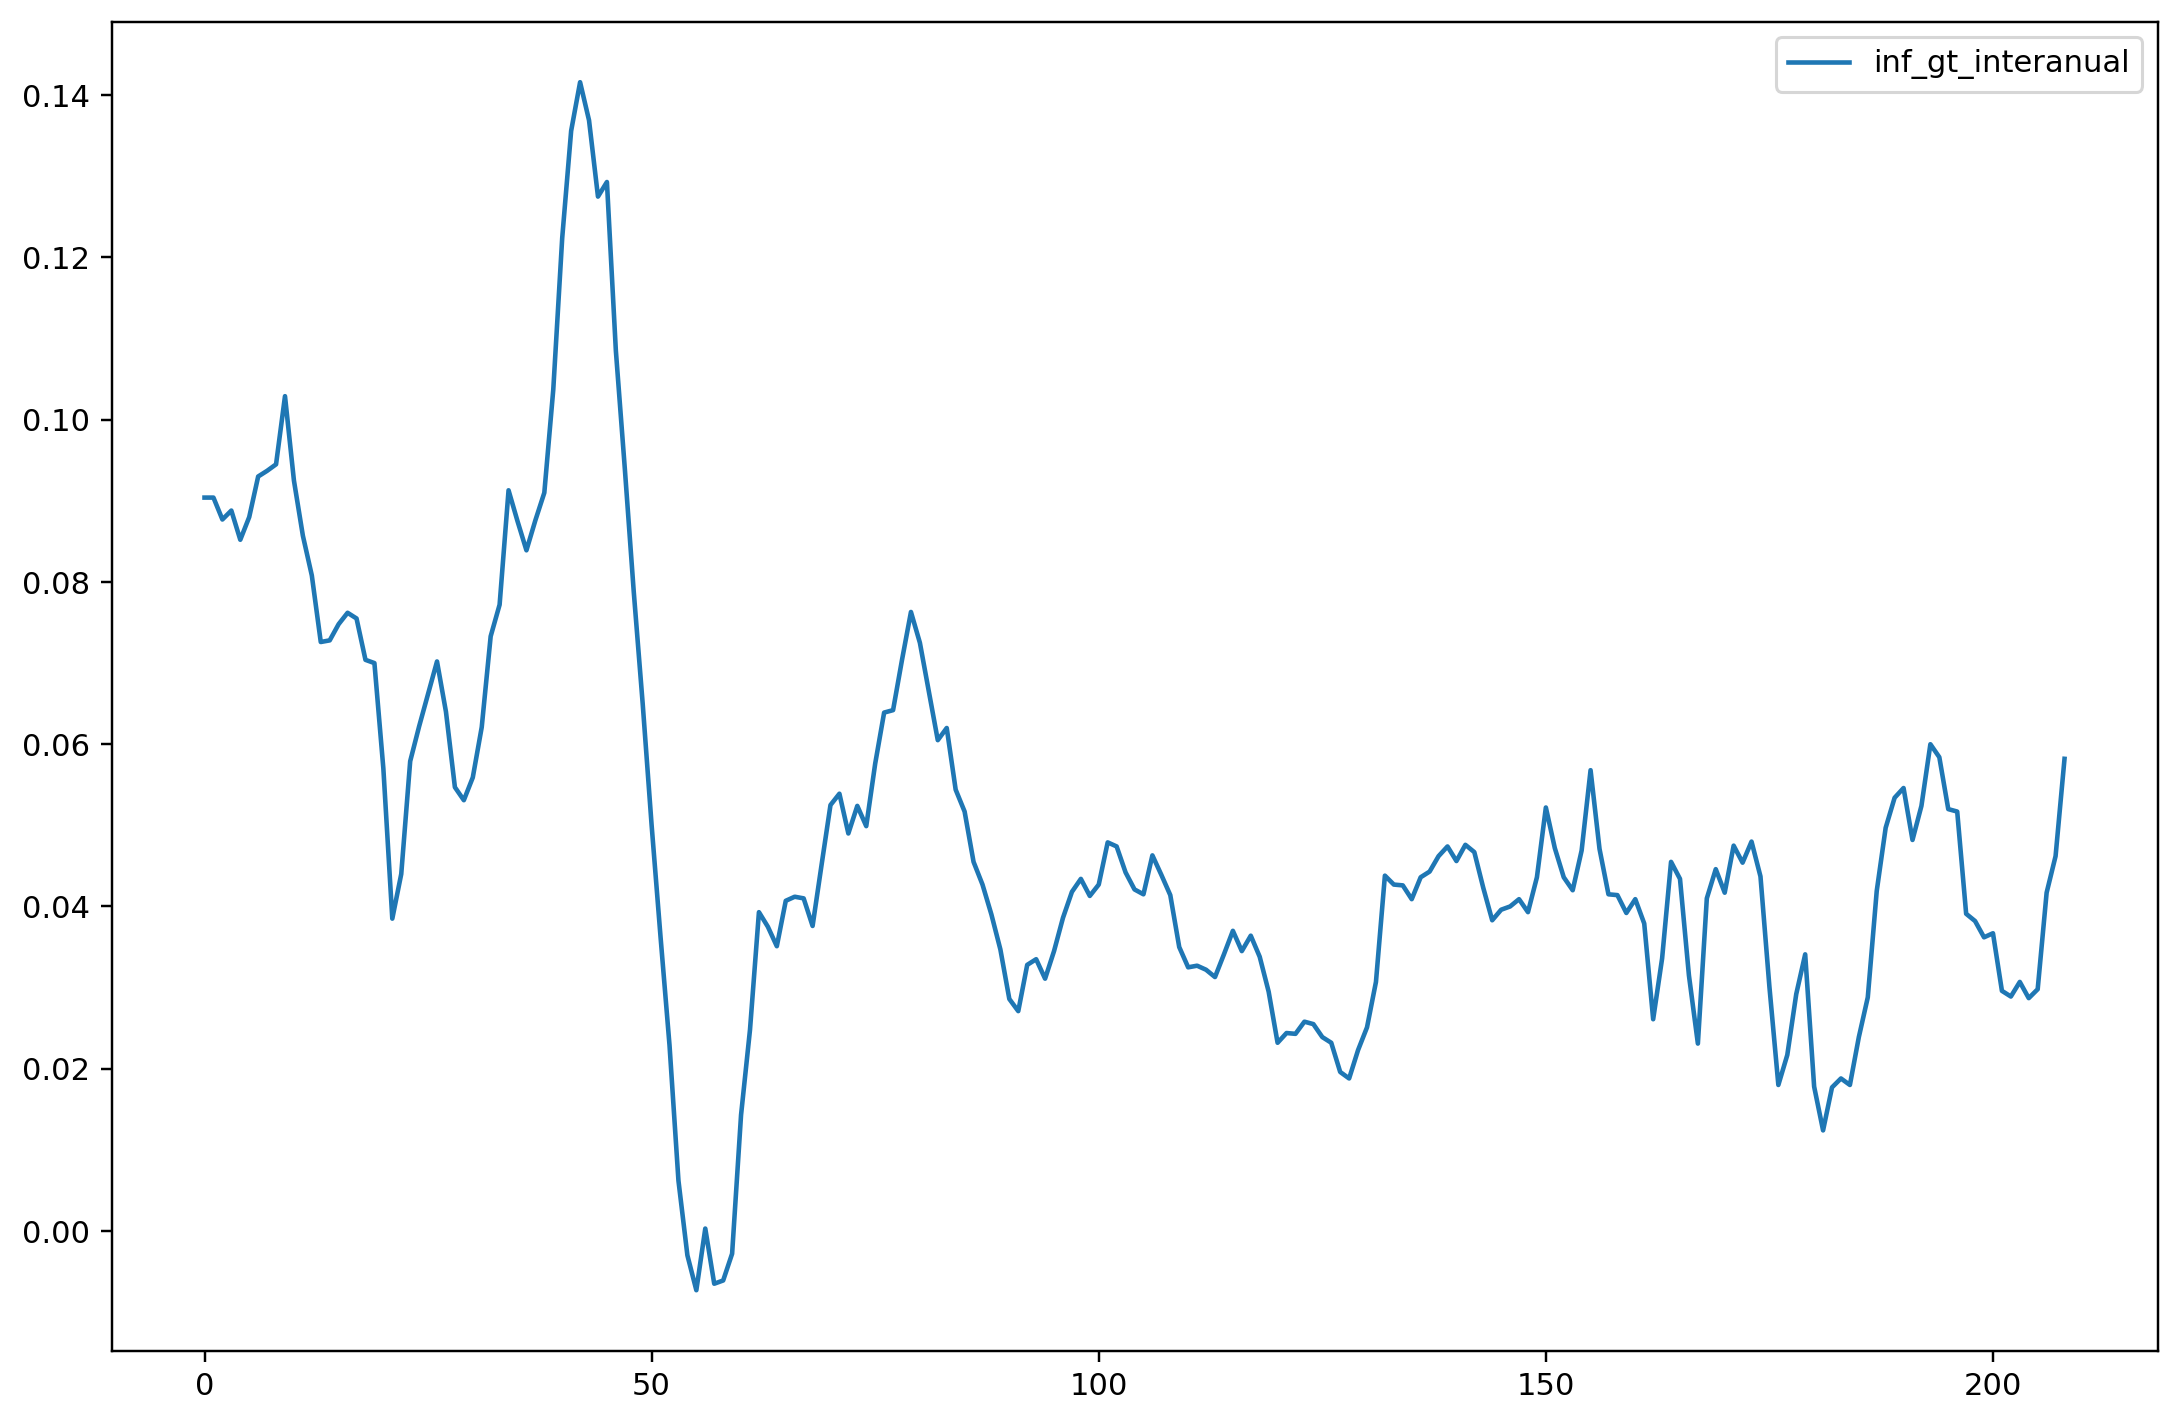

In [270]:
df = pd.read_csv("Data/datainflacion.csv")
inflacionInteranual = df[["Periodo","inf_gt_interanual"]]

inflacionInteranual.plot()
inflacionInteranual

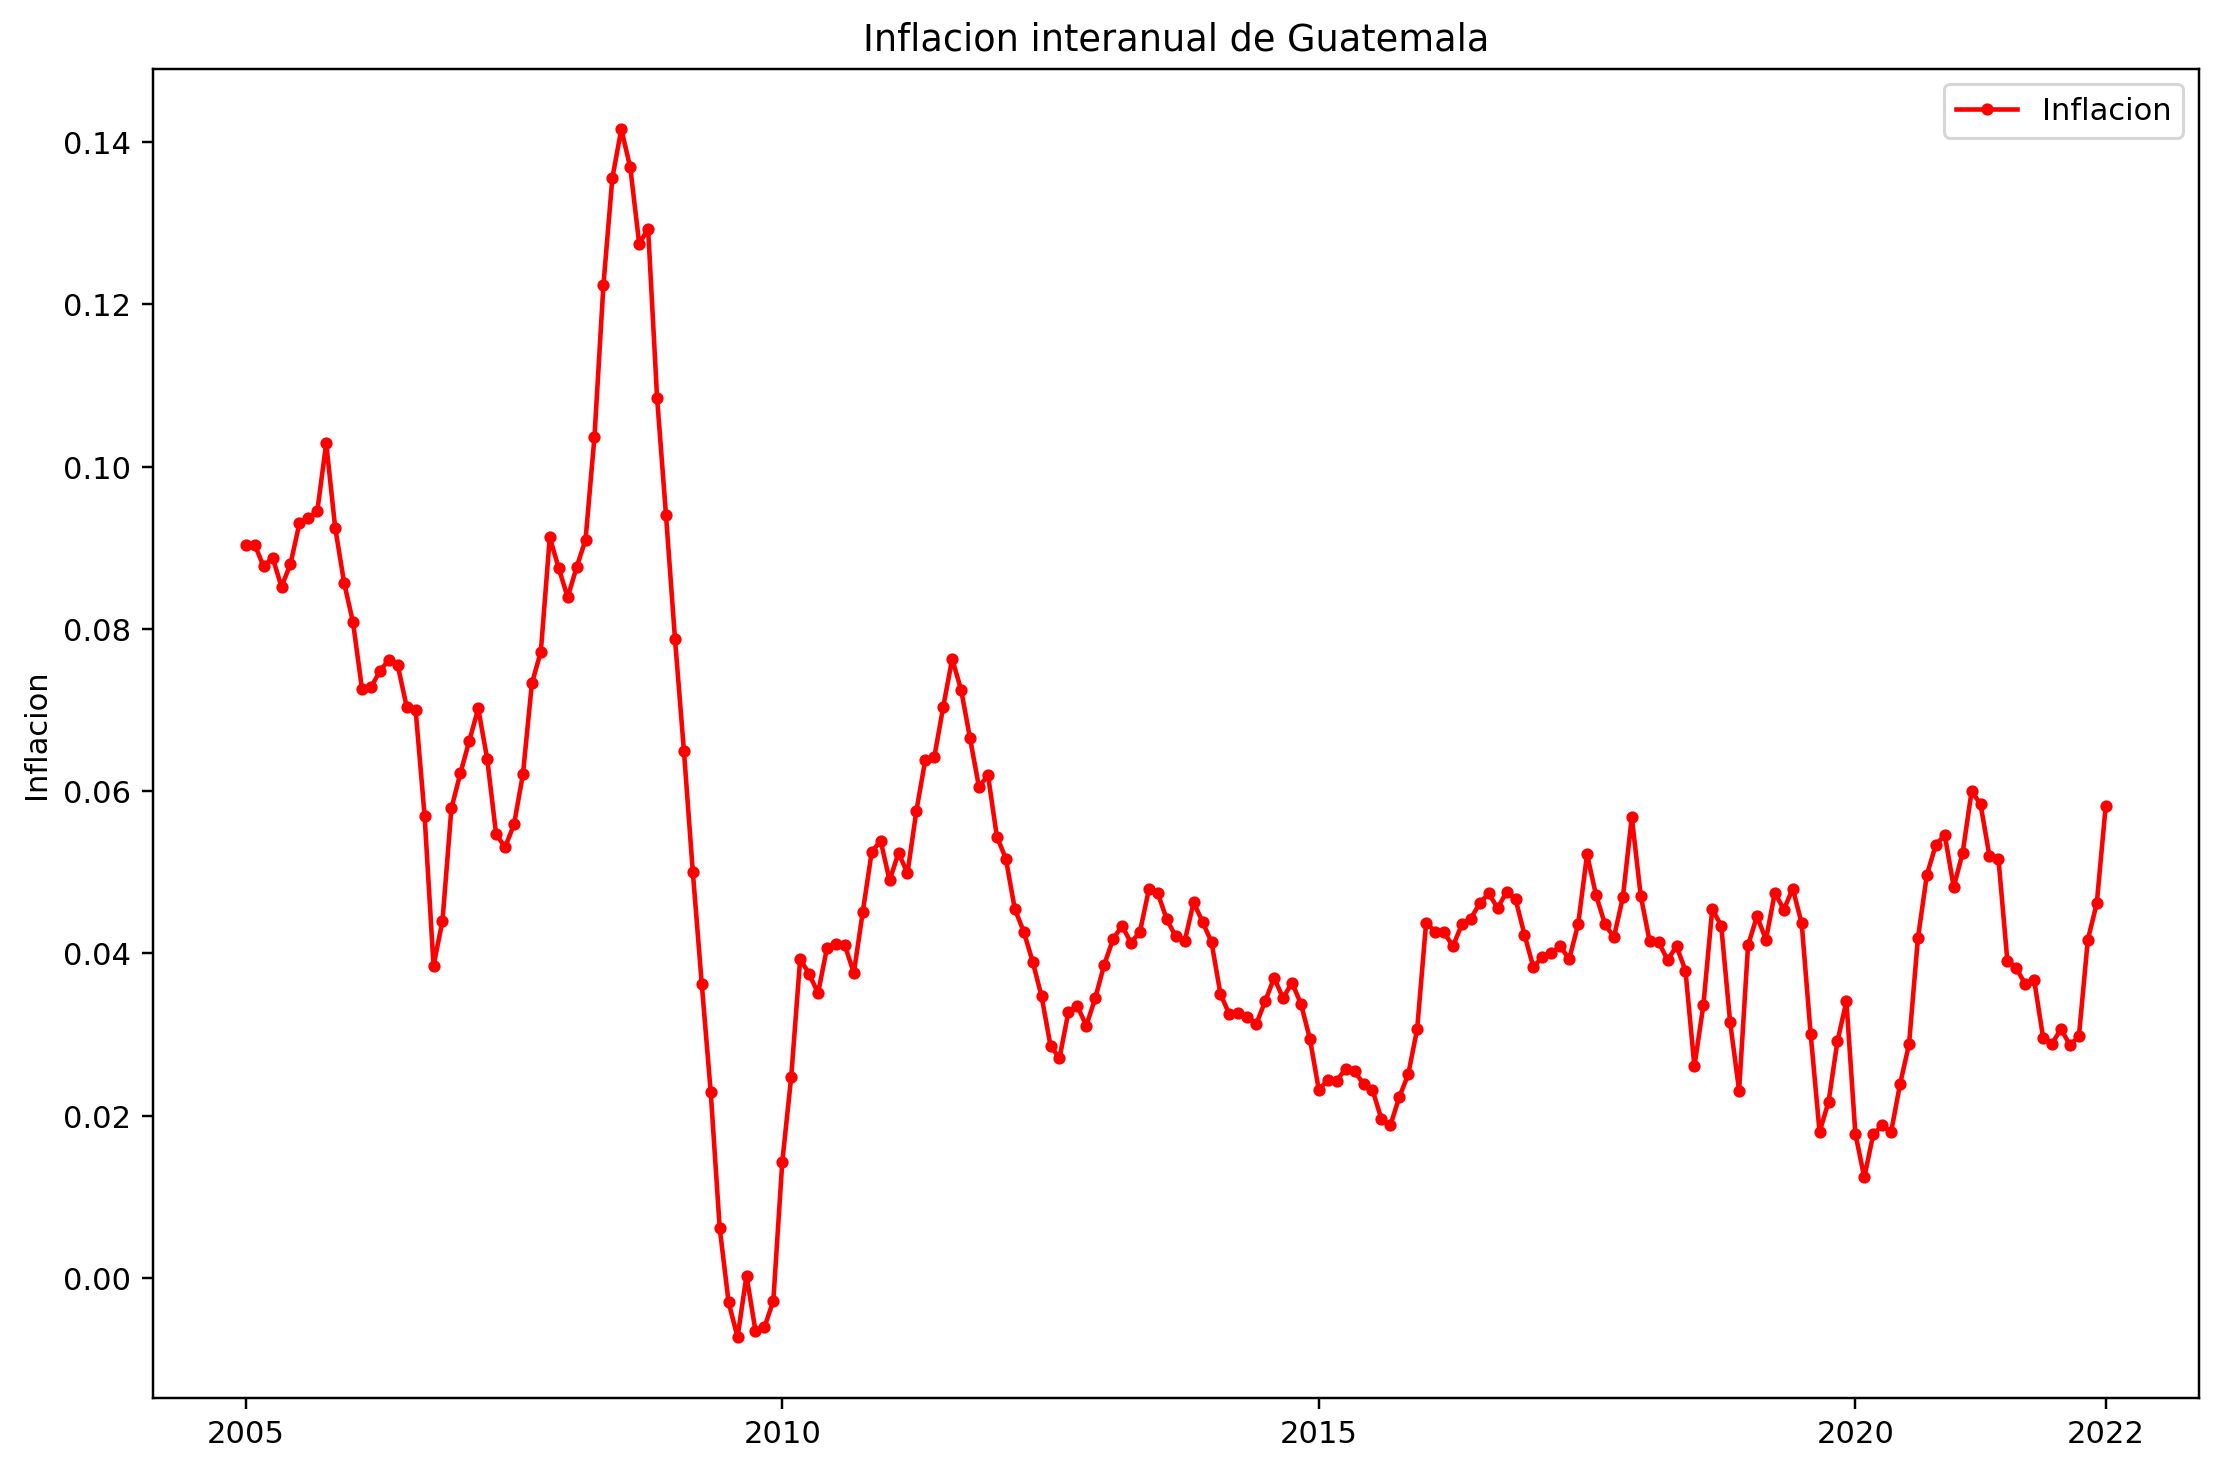

In [271]:
plt.plot(inflacionInteranual.Periodo,inflacionInteranual.inf_gt_interanual, 'r.-', label = 'Inflacion')
plt.title('Inflacion interanual de Guatemala')
plt.ylabel('Inflacion')
plt.legend()
plt.xticks([0,60,120,180,208],['2005','2010','2015','2020','2022'])


#inflacionInteranual.Periodo[::3].tolist()+[2021]
plt.show()

[(0.0, 50.0)]

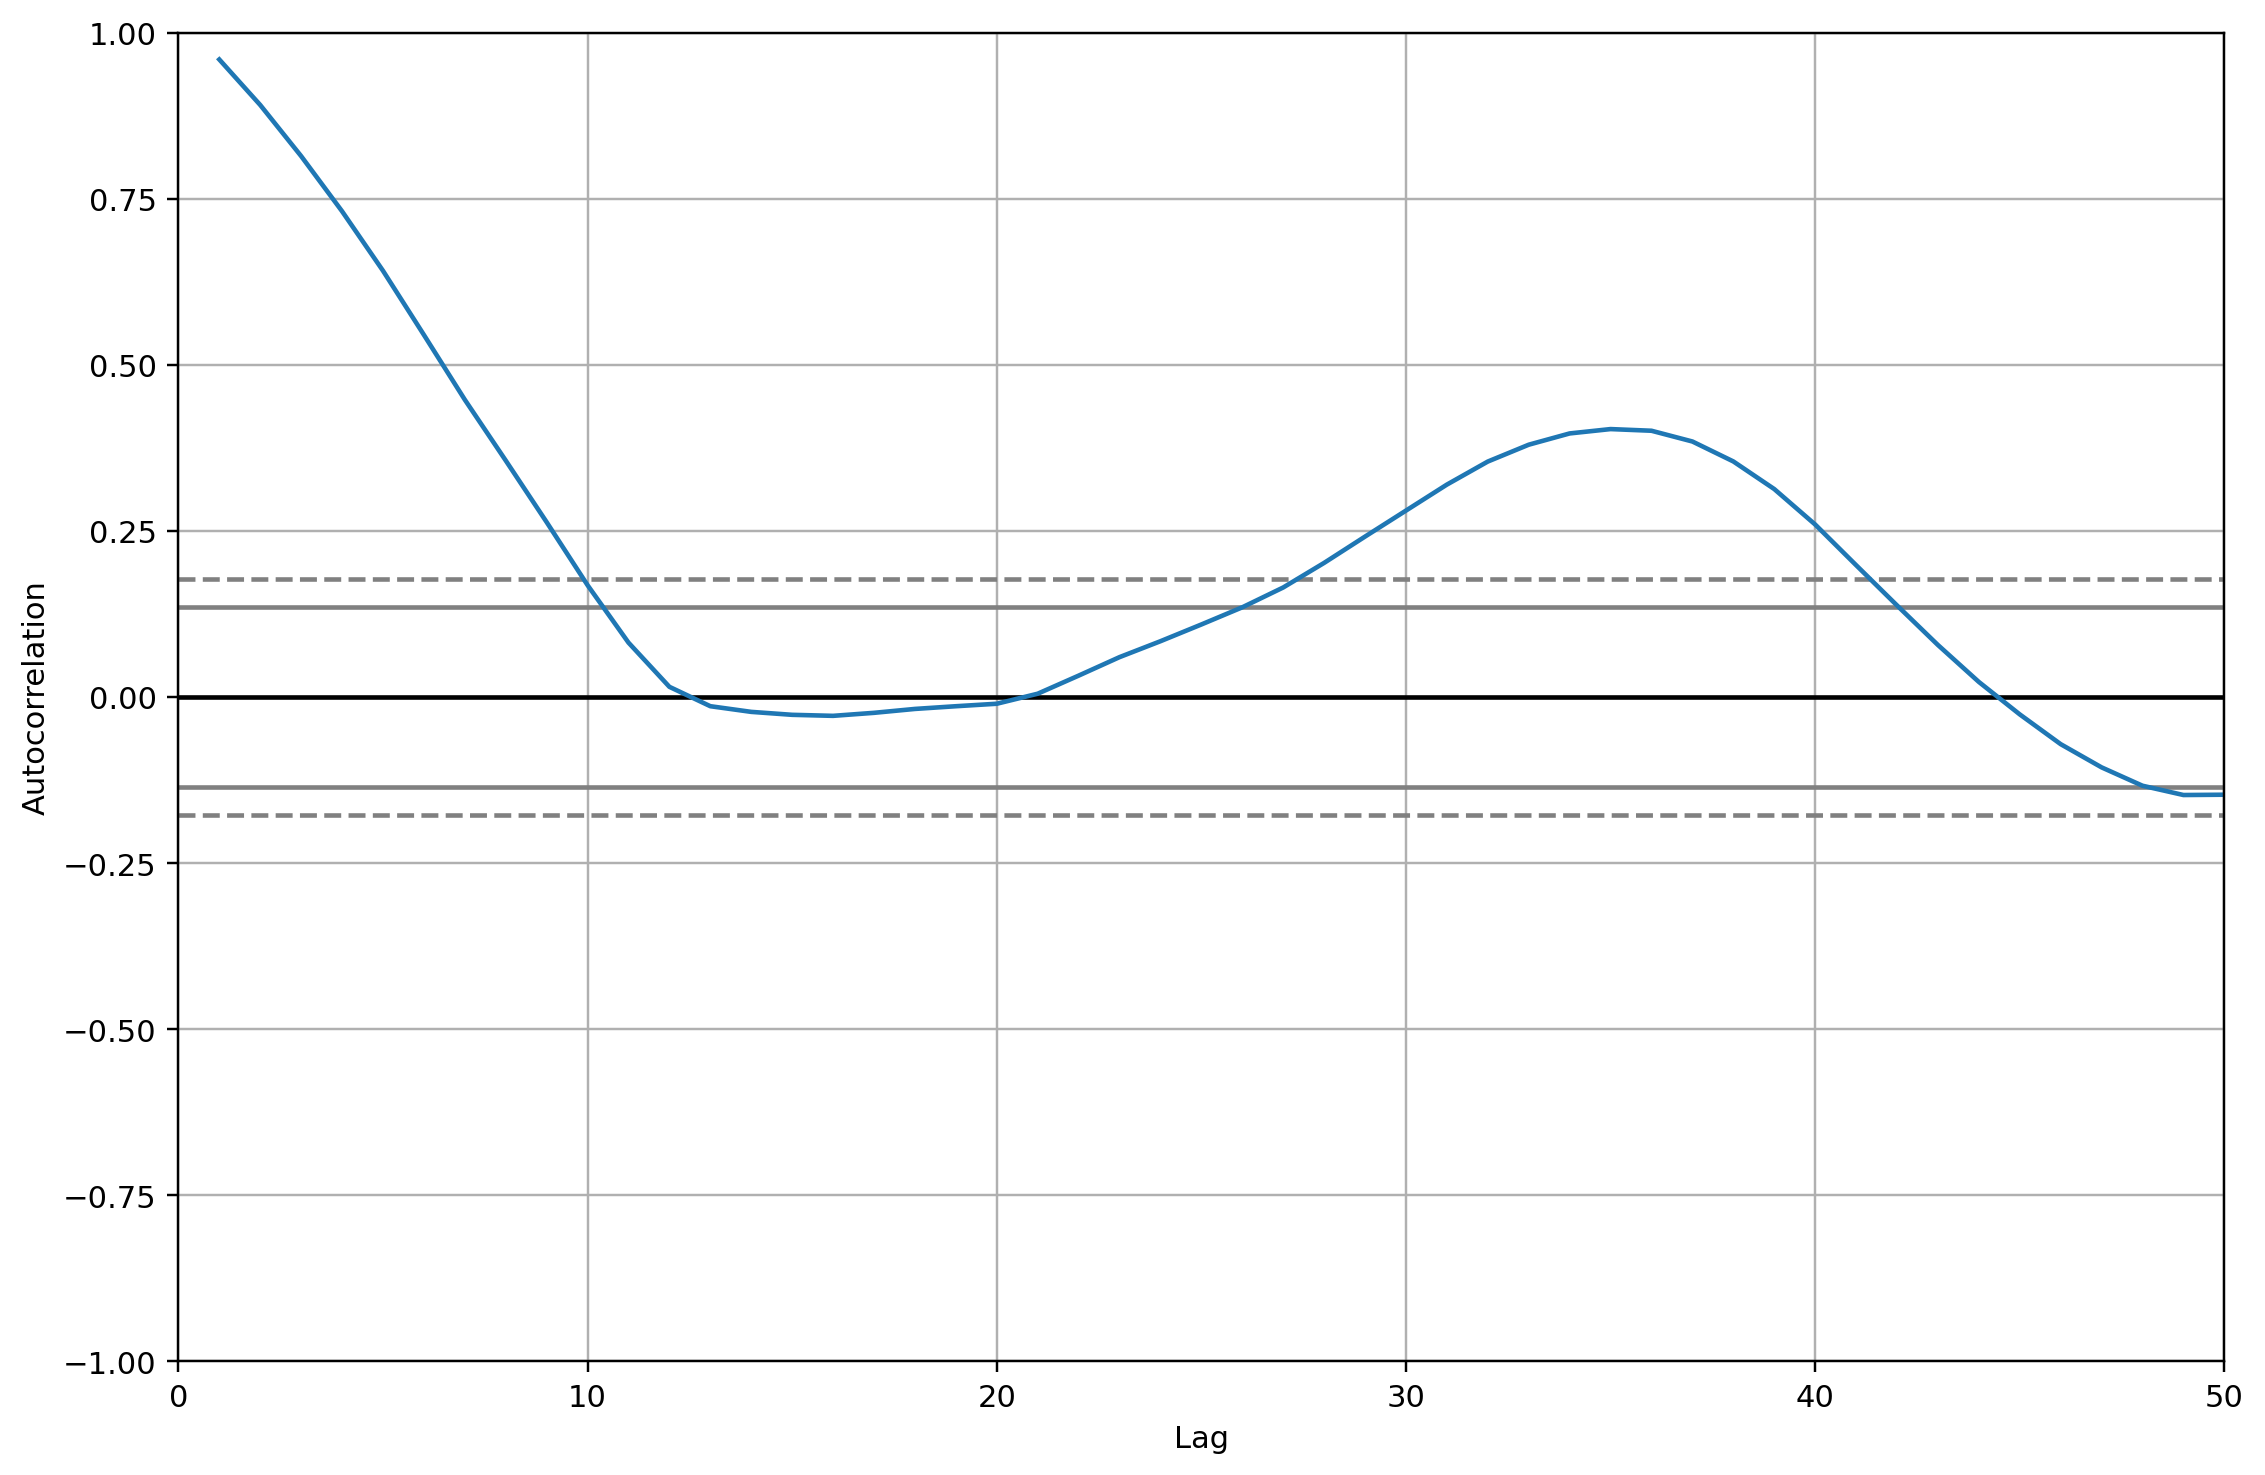

In [272]:
pd.plotting.autocorrelation_plot(inflacionInteranual.inf_gt_interanual).set(xlim = [0,50])

### Para la Autocorrelacion y la Autocorrelacion parcial

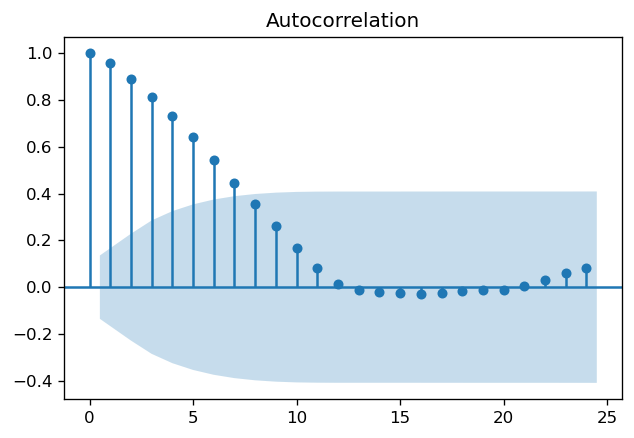

In [273]:
from statsmodels.graphics.tsaplots import plot_acf
plt.rcParams.update({'figure.figsize':(6,4), 'figure.dpi':120})
plot_acf(inflacionInteranual.inf_gt_interanual)
plt.show()

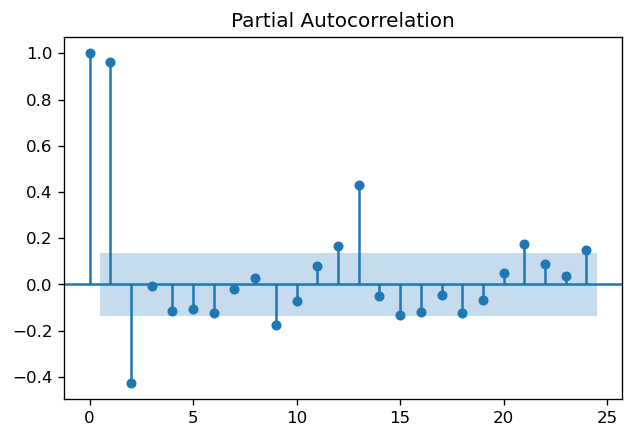

In [274]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(inflacionInteranual.inf_gt_interanual)
plt.show()

### Dickey-Fuller test

In [275]:
from statsmodels.tsa.stattools import adfuller
# ADF Test
def adf_test(series):
    result = adfuller(series, autolag='AIC') #regression='ct'
    print(); print(f'ADF Statistic: {result[0]}')
    print();  print(f'p-value: {result[1]}')
    print();  print(f'n_lags: {result[2]}')

    print(); print('Critial Values:')
    for key, value in result[4].items():
        print(f'   {key}, {value}')   

adf_test(inflacionInteranual.inf_gt_interanual)


ADF Statistic: -2.2669010748116656

p-value: 0.18286528840373362

n_lags: 13

Critial Values:
   1%, -3.464337030867007
   5%, -2.876478799035722
   10%, -2.574733103221565


### Prueba KPSS

In [276]:
from statsmodels.tsa.stattools import kpss

def kpss_test(series, **kw):    
    
    statistic, p_value, n_lags, critical_values = kpss(series, **kw)
    
    # Format Output
    print(); print(f'KPSS Statistic: {statistic}')
    print(); print(f'p-value: {p_value}')
    print(); print(f'num lags: {n_lags}')
    print(); print('Critial Values:')
    for key, value in critical_values.items():
        print(f'   {key} : {value}')
    
kpss_test(inflacionInteranual.inf_gt_interanual)


KPSS Statistic: 0.6470763699083445

p-value: 0.018356693644695953

num lags: 15

Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739


### Para encontrar el orden de diferenciacion optimo en un modelo ARIMA

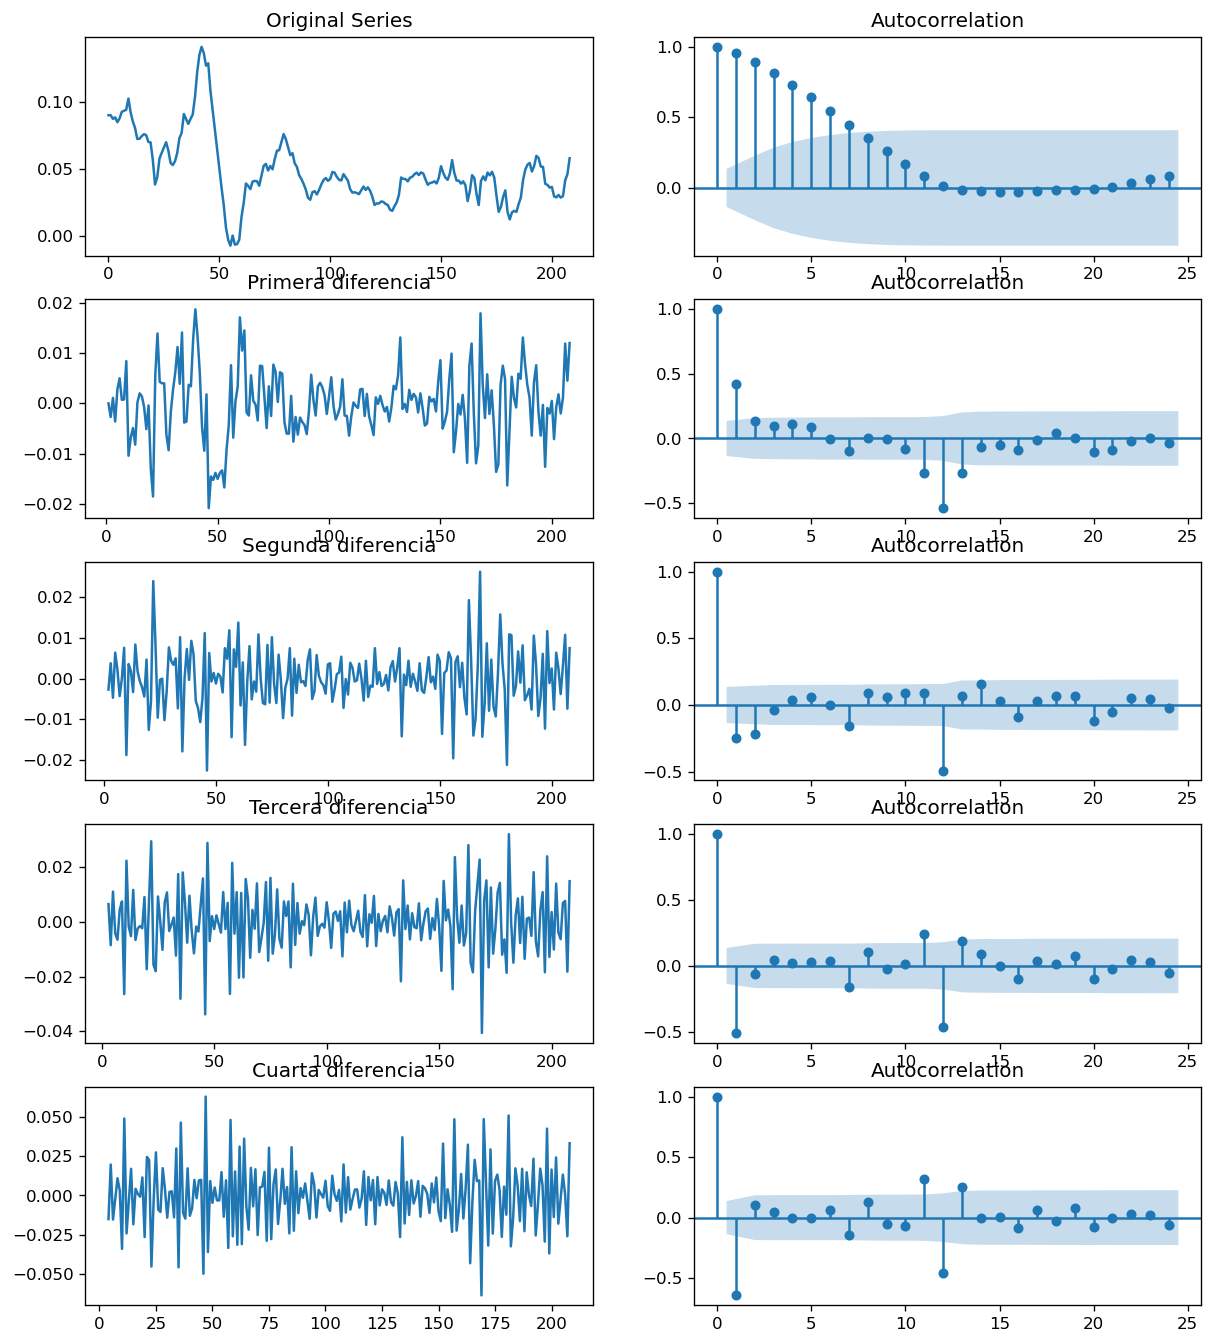

In [277]:
plt.rcParams.update({'figure.figsize':(12,14), 'figure.dpi':120})

# Import data
#df = pd.read_csv('shampoo.csv', header=0, names = ['Sales'])
#df.reset_index(drop=True, inplace=True)

# Original Series
fig, axes = plt.subplots(5, 2, sharex=False)
axes[0, 0].plot(inflacionInteranual.inf_gt_interanual); axes[0, 0].set_title('Original Series')
plot_acf(inflacionInteranual.inf_gt_interanual, ax=axes[0, 1])

# 1st Differencing
df1 = inflacionInteranual.inf_gt_interanual.diff()
axes[1, 0].plot(df1); axes[1, 0].set_title('Primera diferencia')
plot_acf(df1.dropna(), ax=axes[1, 1])

# 2nd Differencing
df2 = inflacionInteranual.inf_gt_interanual.diff().diff()
axes[2, 0].plot(df2); axes[2, 0].set_title('Segunda diferencia')
plot_acf(df2.dropna(), ax=axes[2, 1])

# 3rd Differencing
df3 = inflacionInteranual.inf_gt_interanual.diff().diff().diff()
axes[3, 0].plot(df3); axes[3, 0].set_title('Tercera diferencia')
plot_acf(df3.dropna(), ax=axes[3, 1])

# 3rd Differencing
df4 = inflacionInteranual.inf_gt_interanual.diff().diff().diff().diff()
axes[4, 0].plot(df4); axes[4, 0].set_title('Cuarta diferencia')
plot_acf(df4.dropna(), ax=axes[4, 1])

plt.show()

### Estadistica de ADF y KPSS 

In [278]:
warnings.filterwarnings("ignore")

print("---------------------------------------------")
print("Primera diferencia: ")
print("---------------------------------------------")
df1 = inflacionInteranual.inf_gt_interanual.diff()
print(); print("---------------------------------------------")
adf_test(df1.dropna())
print(); print("---------------------------------------------")
kpss_test(df1.dropna())
print(); print("---------------------------------------------")


print(); print("---------------------------------------------")
print("Segunda diferencia: ")
print("---------------------------------------------")
df2 = inflacionInteranual.inf_gt_interanual.diff().diff()
print(); print("---------------------------------------------")
adf_test(df2.dropna())
print(); print("---------------------------------------------")
kpss_test(df2.dropna())
print(); print("---------------------------------------------")

print(); print("---------------------------------------------")
print("Tercera diferencia: ")
print("---------------------------------------------")
df3 = inflacionInteranual.inf_gt_interanual.diff().diff().diff()
print(); print("---------------------------------------------")
adf_test(df3.dropna())
print(); print("---------------------------------------------")
kpss_test(df3.dropna())
print(); print("---------------------------------------------")

print(); print("---------------------------------------------")
print("Cuarta diferencia: ")
print("---------------------------------------------")
df4 = inflacionInteranual.inf_gt_interanual.diff().diff().diff().diff()
print(); print("---------------------------------------------")
adf_test(df4.dropna())
print(); print("---------------------------------------------")
kpss_test(df4.dropna())
print(); print("---------------------------------------------")

---------------------------------------------
Primera diferencia: 
---------------------------------------------

---------------------------------------------

ADF Statistic: -5.988235741371002

p-value: 1.7709835824927618e-07

n_lags: 12

Critial Values:
   1%, -3.464337030867007
   5%, -2.876478799035722
   10%, -2.574733103221565

---------------------------------------------

KPSS Statistic: 0.06847889971786895

p-value: 0.1

num lags: 15

Critial Values:
   10% : 0.347
   5% : 0.463
   2.5% : 0.574
   1% : 0.739

---------------------------------------------

---------------------------------------------
Segunda diferencia: 
---------------------------------------------

---------------------------------------------

ADF Statistic: -6.984837829310654

p-value: 8.018234871104528e-10

n_lags: 15

Critial Values:
   1%, -3.465058702600837
   5%, -2.8767942675230356
   10%, -2.5749014492475535

---------------------------------------------

KPSS Statistic: 0.06475020031622782

p-valu

## Para encontrar el orden del termino autoregresivo

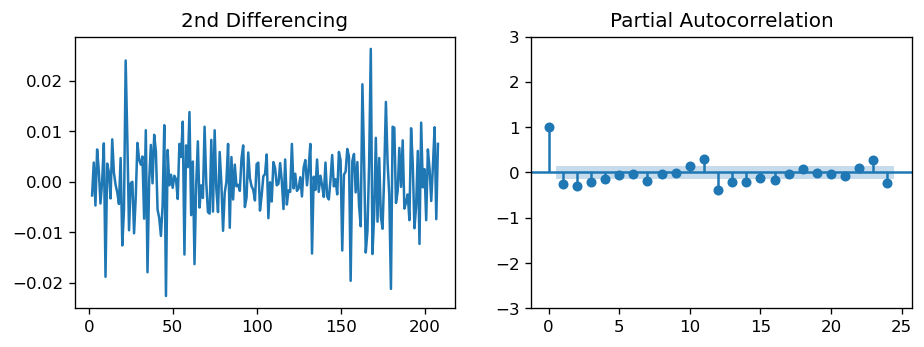

In [279]:
# PACF plot 
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=False)

df2 = inflacionInteranual.inf_gt_interanual.diff().diff() #.diff() #.diff()

axes[0].plot(df2); axes[0].set_title('2nd Differencing')
axes[1].set(ylim=(-3,3)) #, xlim=(-1,25)
plot_pacf(df2.dropna(), ax=axes[1]) #PACF

plt.show()


## Para encontrar el orden del termino MA

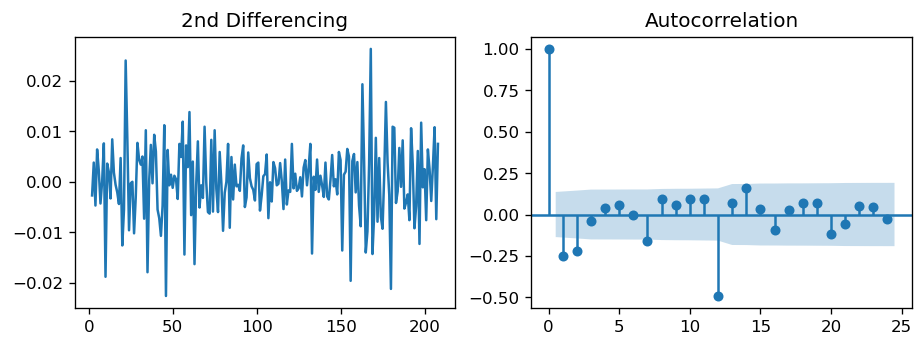

In [280]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
fig, axes = plt.subplots(1, 2, sharex=False)

#df2 = df["Inflation_ConsumerPrice_Annual_Percentage"].diff().diff() #.diff() #.diff()
axes[0].plot(df2); axes[0].set_title('2nd Differencing')
#axes[1].set(ylim=(0,1.2))
plot_acf(df2.dropna(), ax=axes[1]) # ACF

plt.show()


### ADF test en la segunda diferencia

In [281]:
adf_test(df2.dropna())



ADF Statistic: -6.984837829310654

p-value: 8.018234871104528e-10

n_lags: 15

Critial Values:
   1%, -3.465058702600837
   5%, -2.8767942675230356
   10%, -2.5749014492475535


## Construyendo el modelo ARIMA

In [282]:
from statsmodels.tsa.arima_model import ARIMA

                              ARMA Model Results                              
Dep. Variable:      inf_gt_interanual   No. Observations:                  209
Model:                     ARMA(2, 0)   Log Likelihood                 769.224
Method:                       css-mle   S.D. of innovations              0.006
Date:                Wed, 17 Aug 2022   AIC                          -1530.448
Time:                        10:32:09   BIC                          -1517.079
Sample:                             0   HQIC                         -1525.043
                                                                              
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.0517      0.008      6.293      0.000       0.036       0.068
ar.L1.inf_gt_interanual     1.4026      0.062     22.689      0.000       1.281       1.524


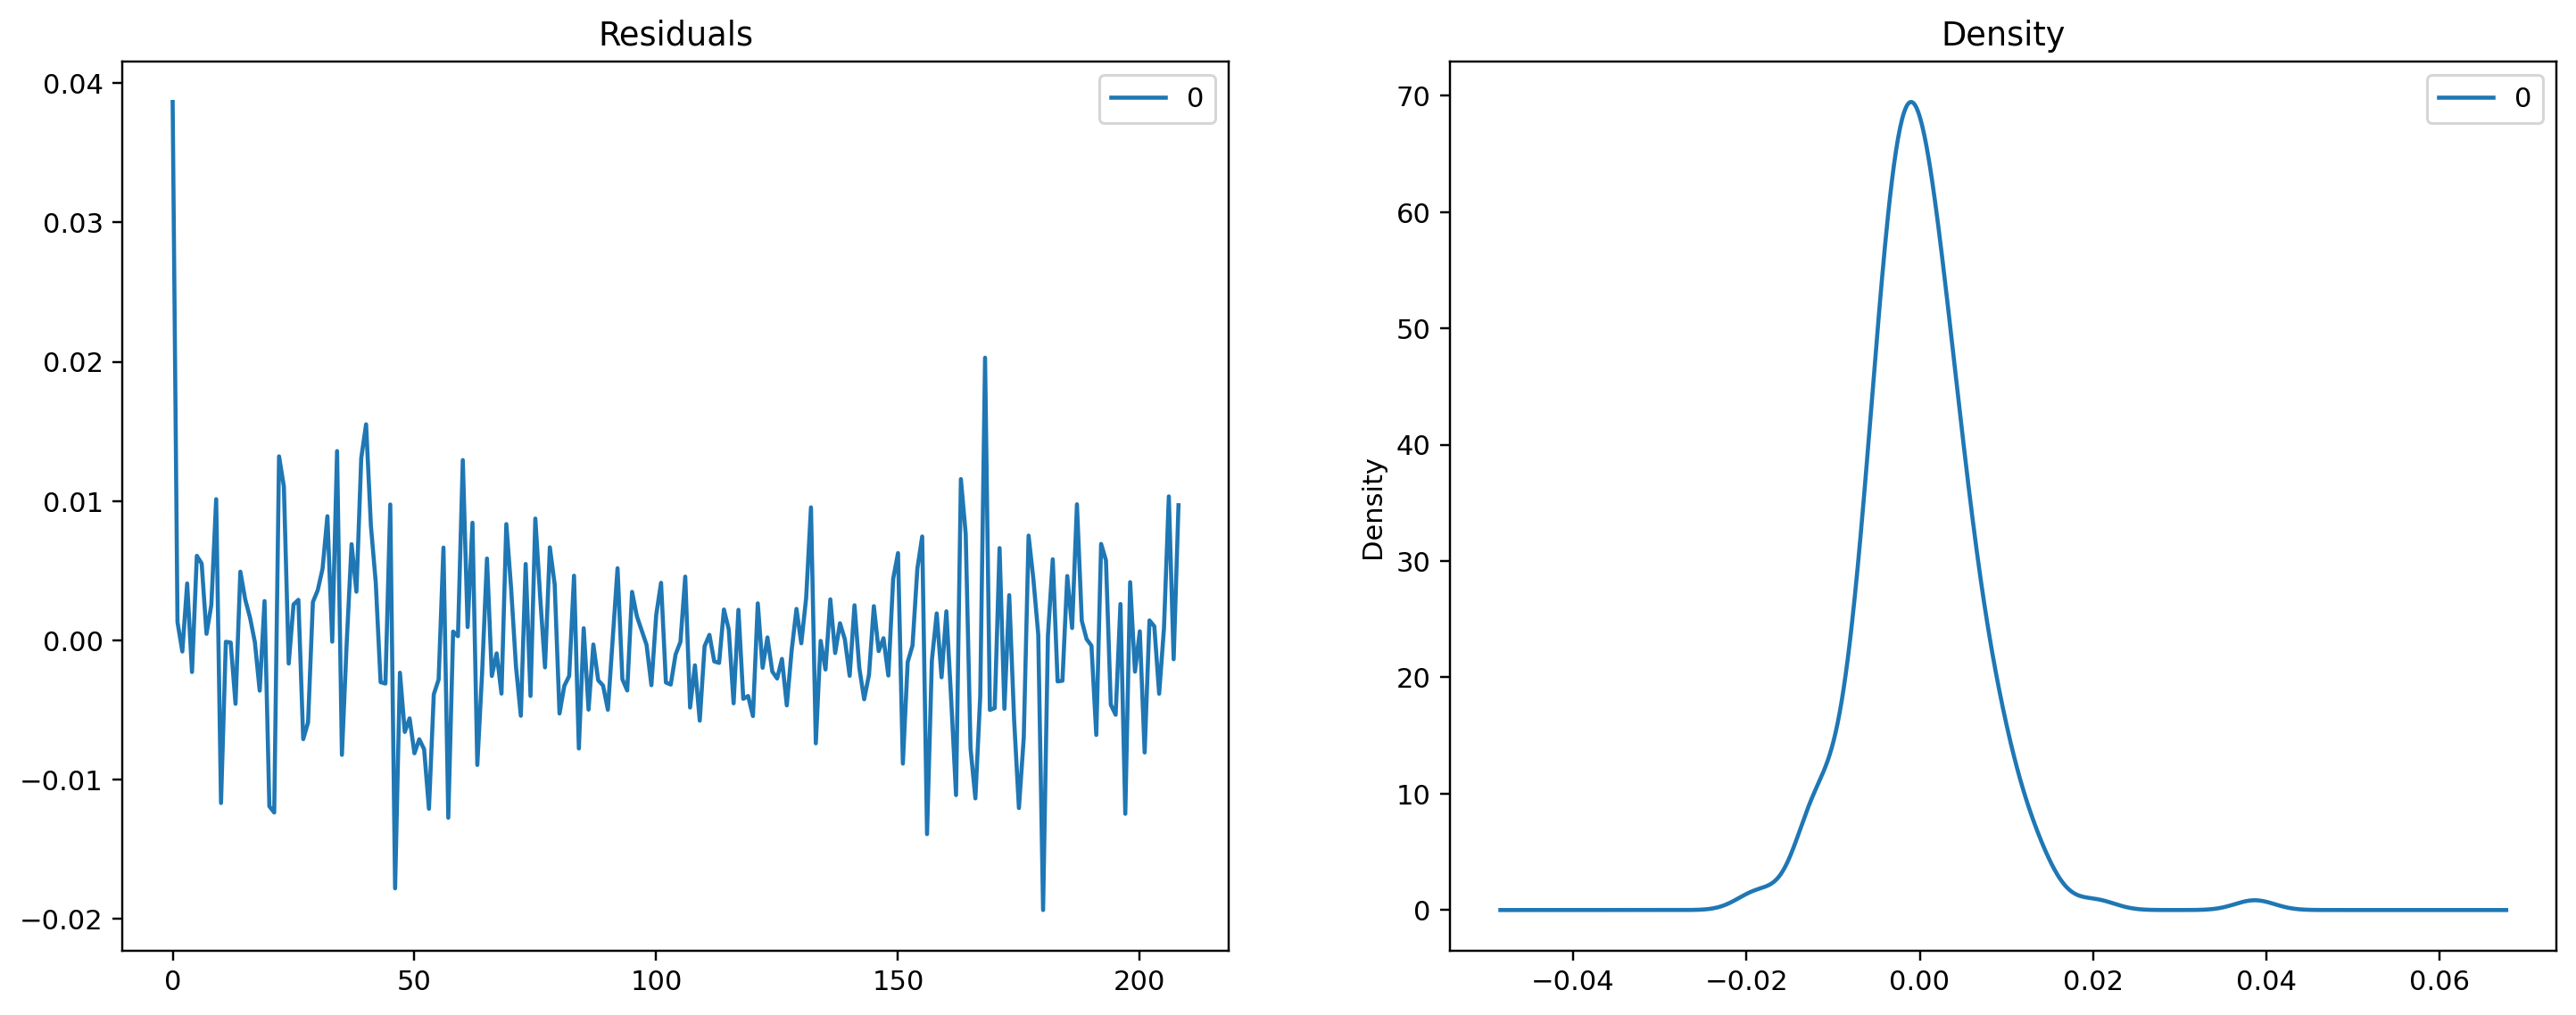

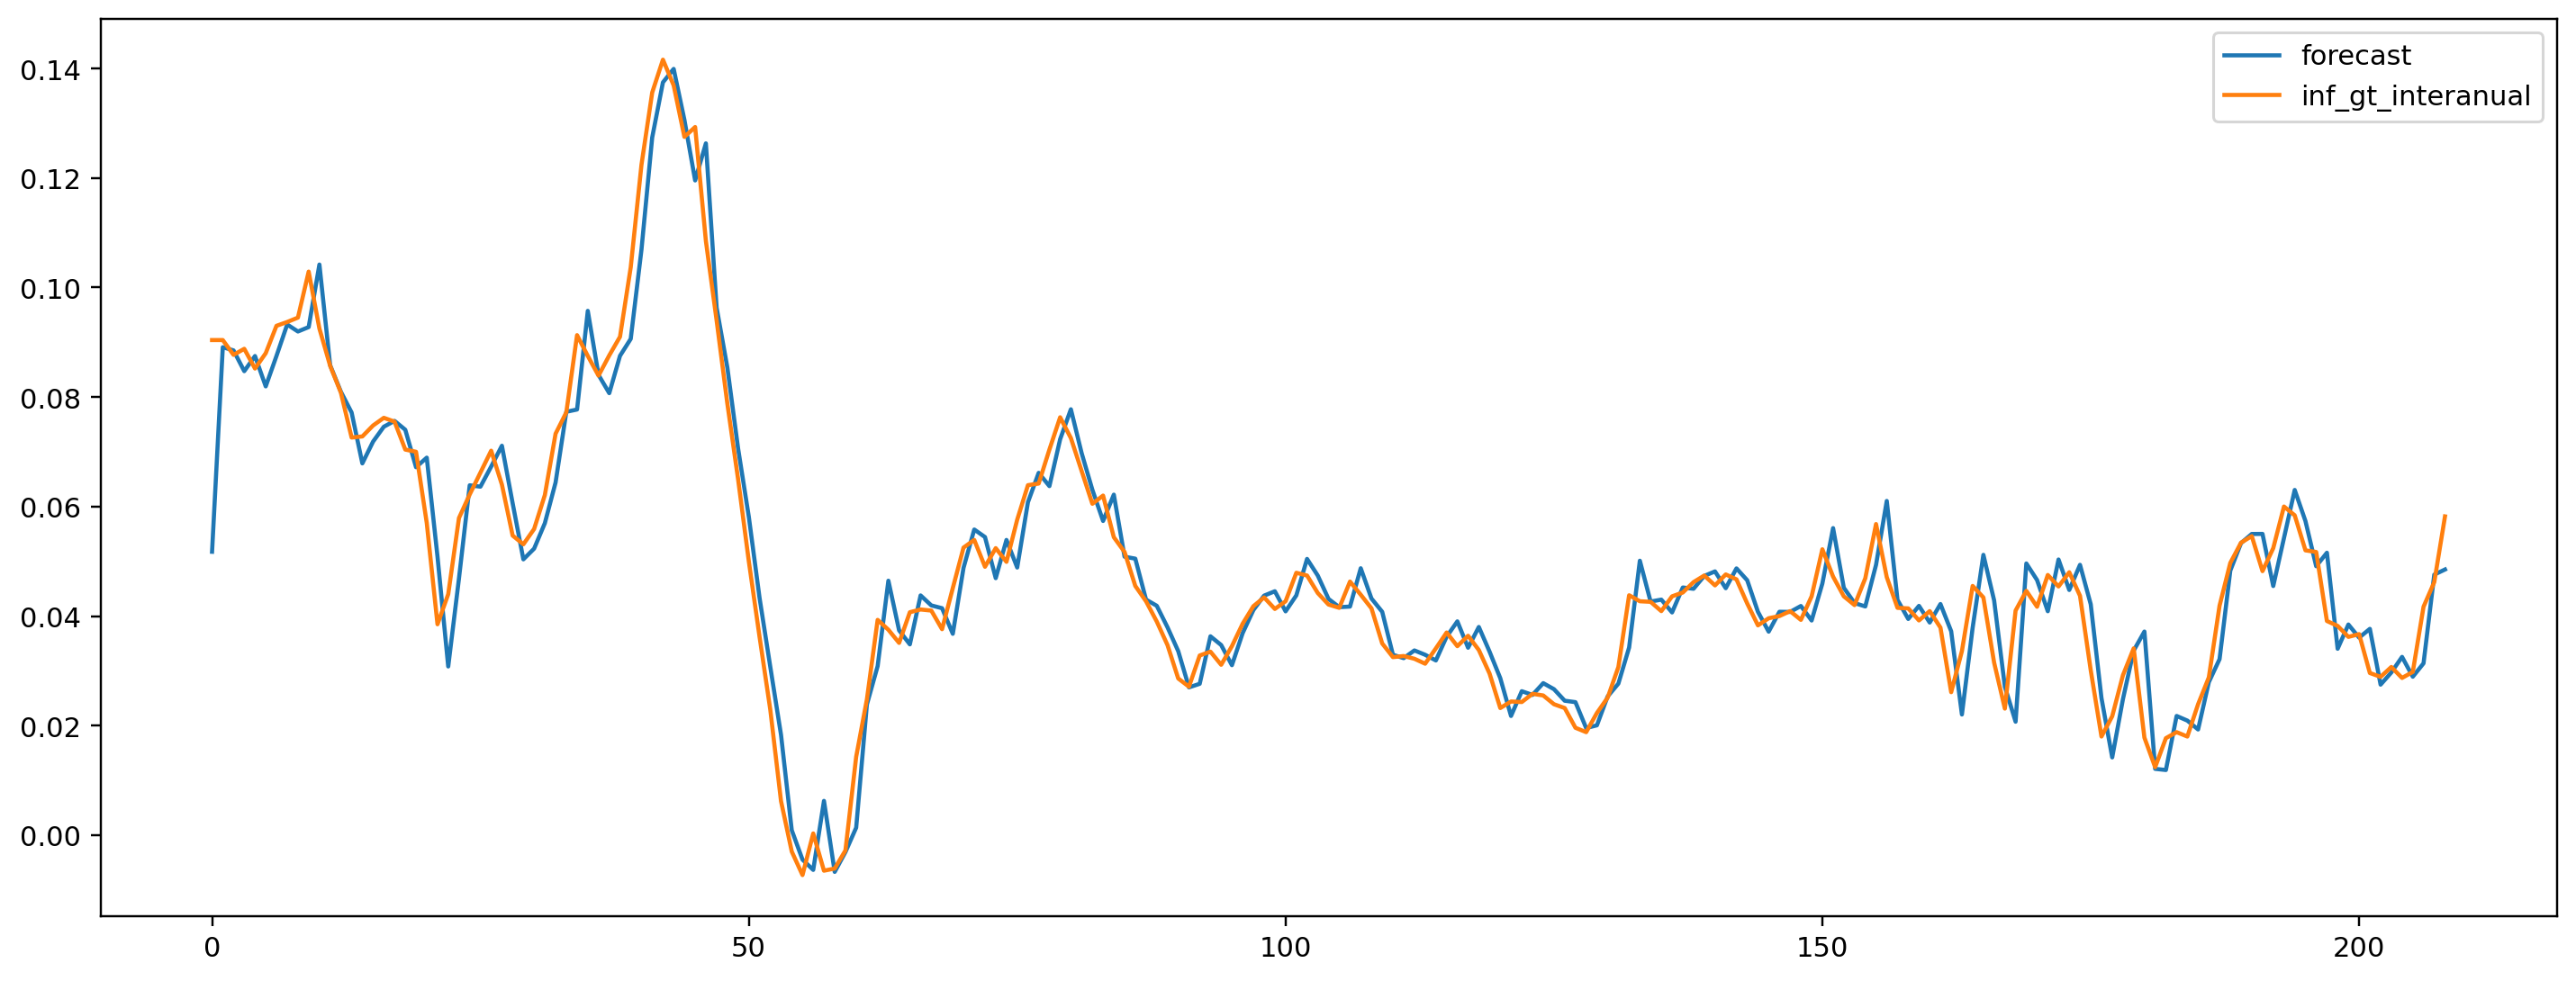

In [283]:
plt.rcParams.update({'figure.figsize':(16,6), 'figure.dpi':220})

#df = read_csv(filename)
#df = df.set_index('Year')

# ARIMA Model
model = ARIMA(inflacionInteranual.inf_gt_interanual, order=(2,0,0)) #cambiar a 2,0,0
model_fit = model.fit(disp=0)
print(model_fit.summary())

# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [284]:
modeloARIMAfitted = model_fit.predict()

In [285]:
prediccionARIMA = model_fit.predict(start = 208, end = 211)
prediccionARIMA 

208    0.048503
209    0.063303
210    0.065042
211    0.065176
dtype: float64

## Utilizando Auto ARIMA

In [286]:
import pmdarima as pm

In [287]:
model_with_auto_d = pm.auto_arima(inflacionInteranual.inf_gt_interanual, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=4, max_q=4, # maximum p, q
                      m=1,              # frequency of series
                      
                      d=None,           # let model determine 'd'
                      
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model_with_auto_d.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-1519.170, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-613.272, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=-1481.844, Time=0.10 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-1521.193, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=-1522.716, Time=0.08 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=-1521.074, Time=0.09 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=-1519.395, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-1530.379, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-1485.461, Time=0.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-1528.391, Time=0.14 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-1528.414, Time=0.21 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-1524.688, Time=0.16 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-1526.228, Time=0.19 sec

Best model:  ARIMA(2,0,0)

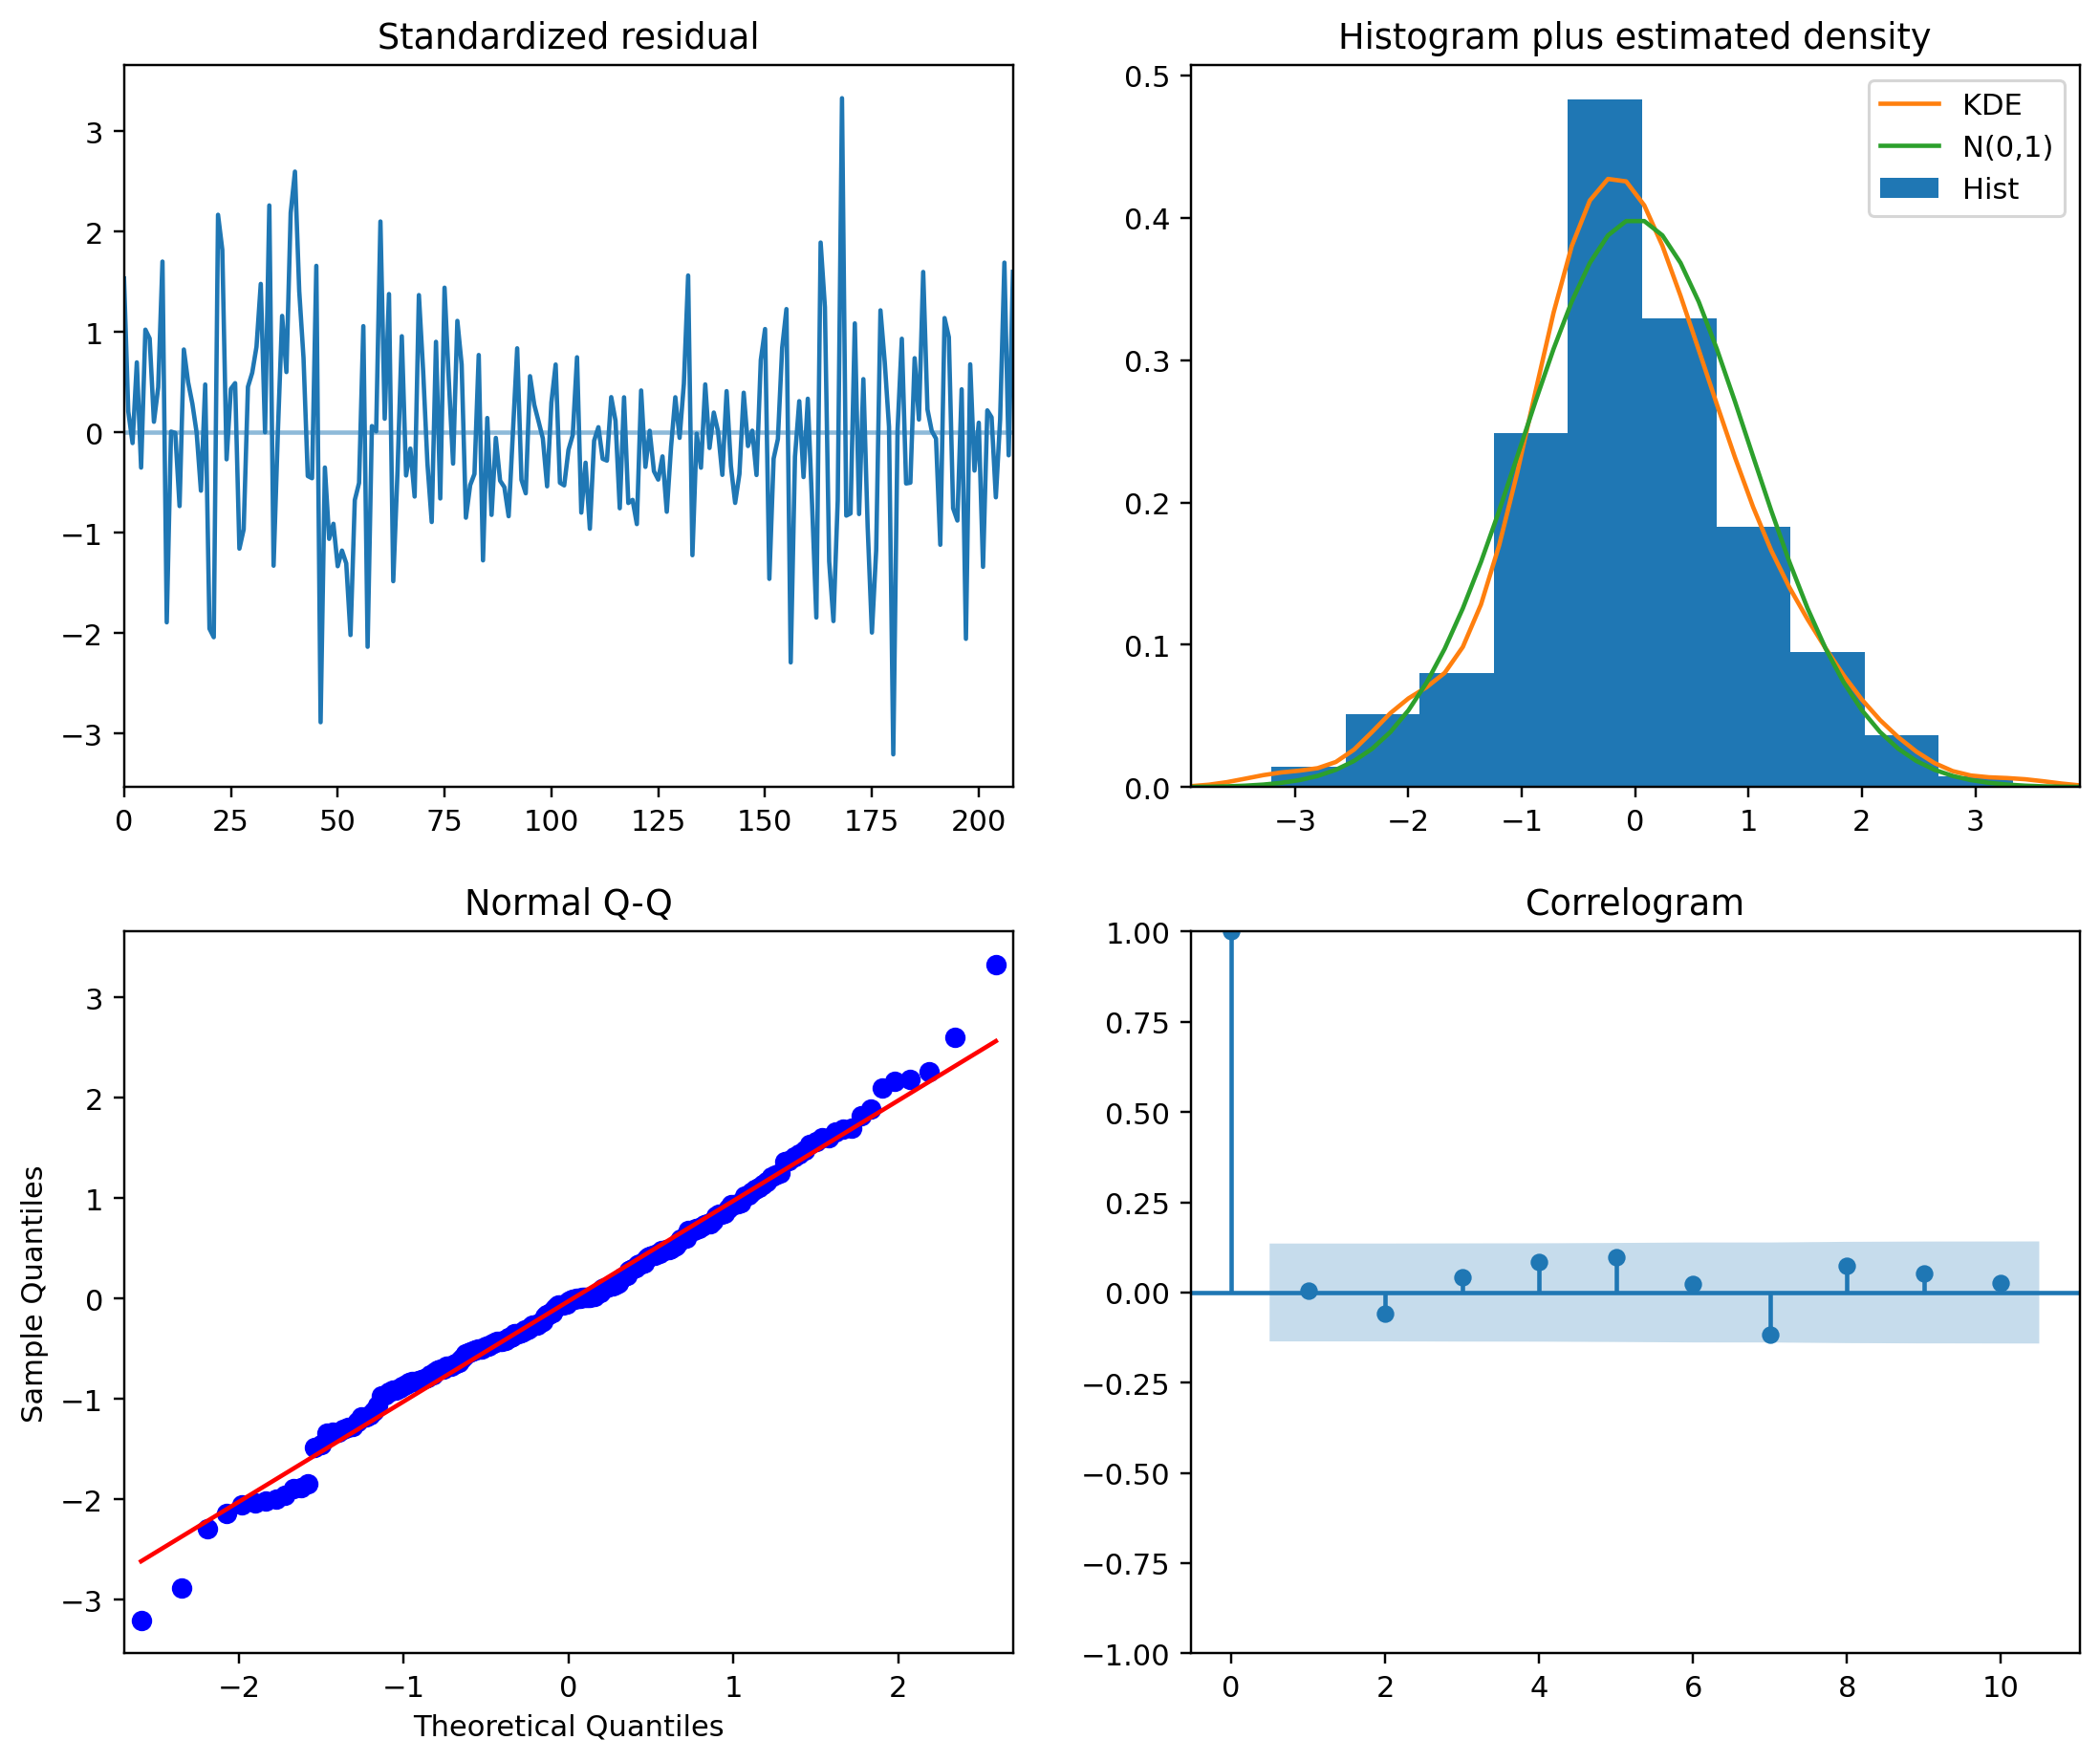

In [288]:
model_with_auto_d.plot_diagnostics(figsize=(12,10))
plt.show()

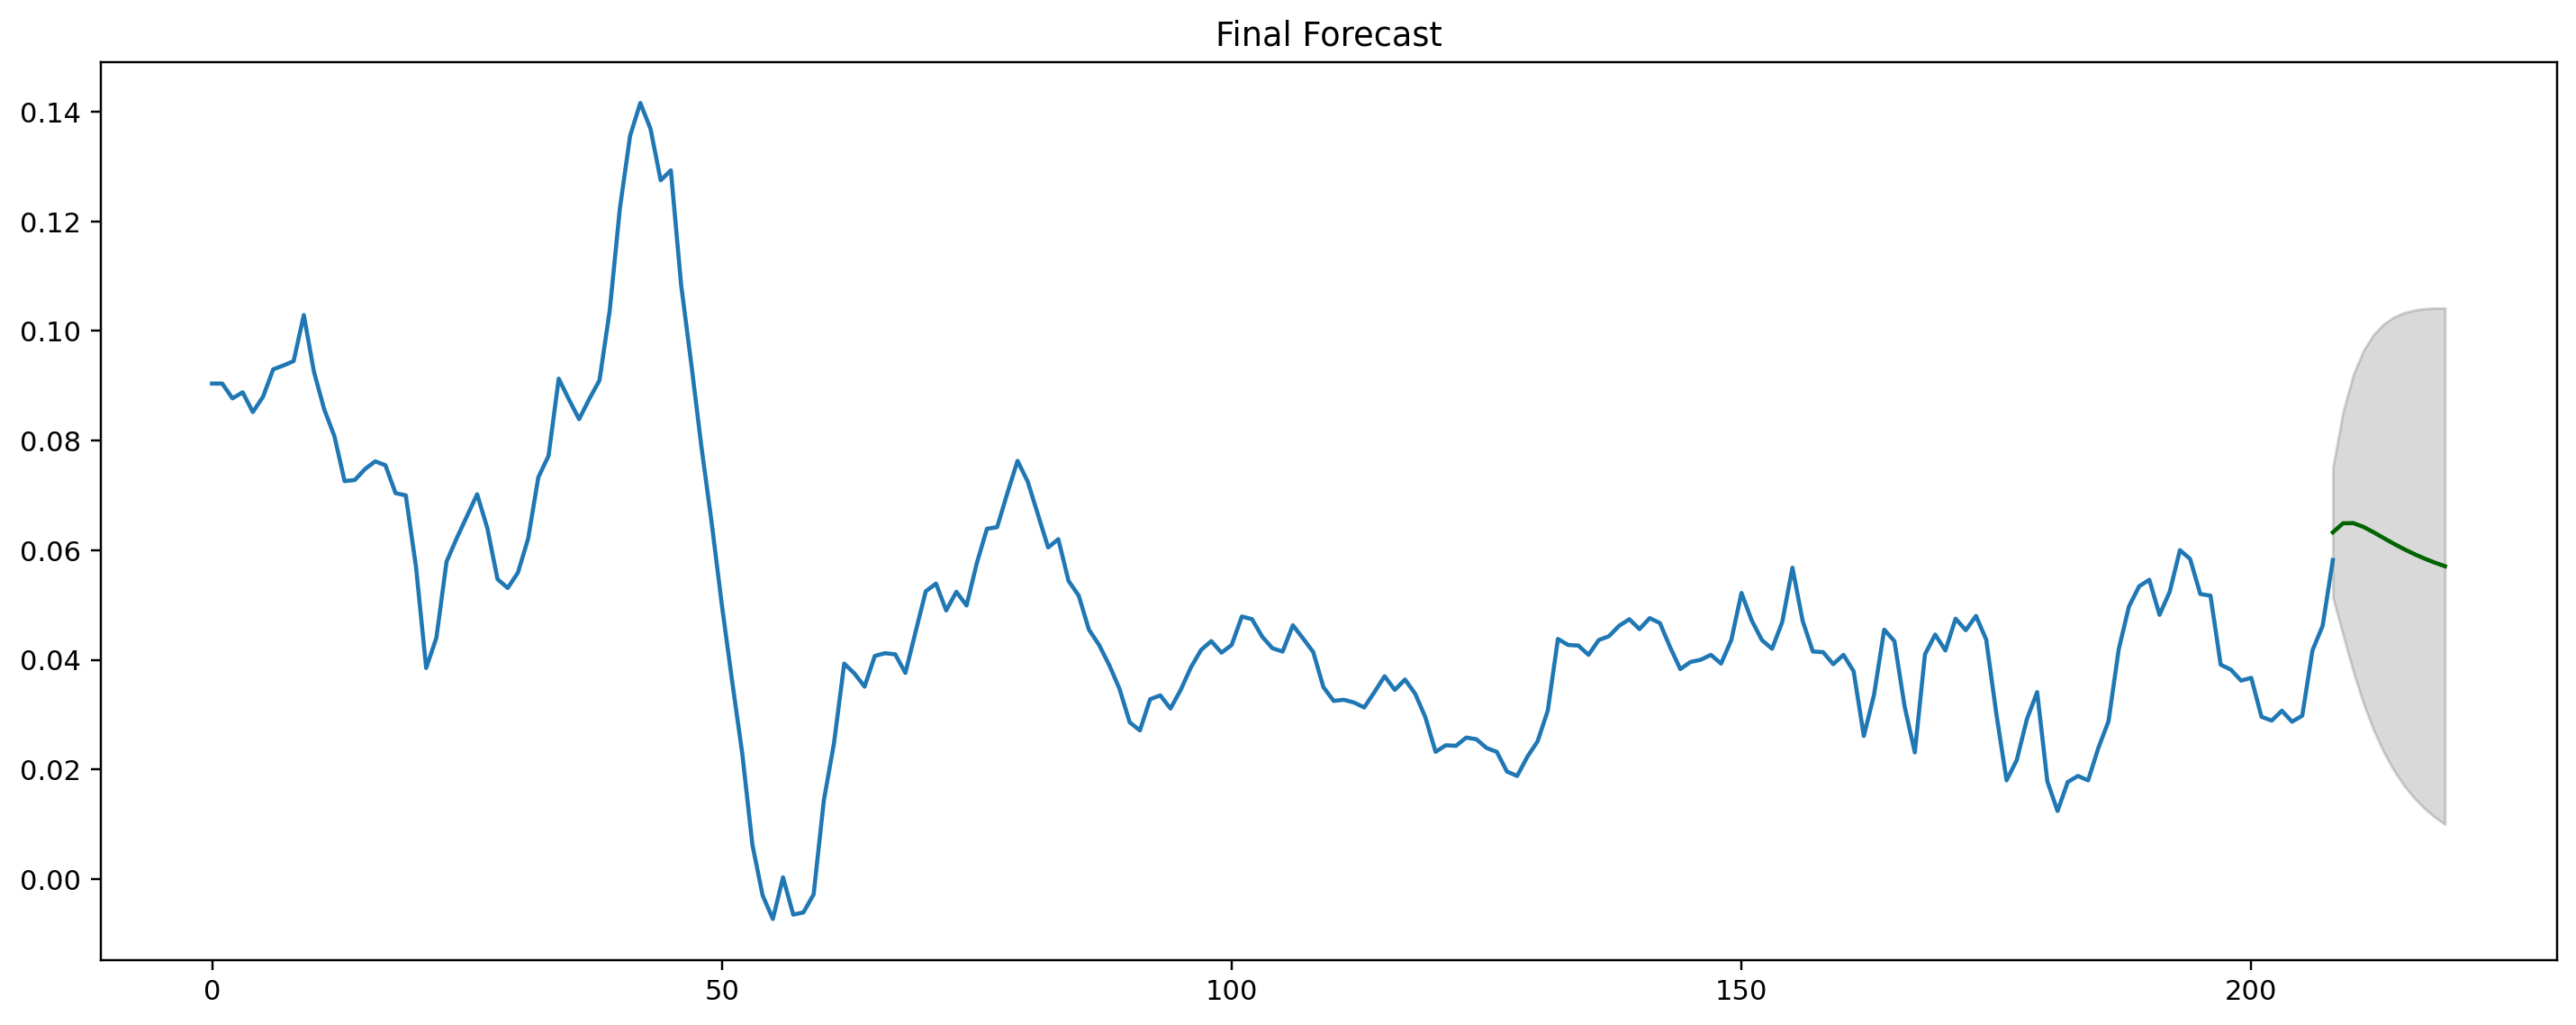

In [289]:
# Forecast
n_periods = 12
fc, confint = model_with_auto_d.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df)-1, len(df)+n_periods-1)
#index_of_fc = np.arange(2020, 2020+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(inflacionInteranual.inf_gt_interanual)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast")
plt.show()

#print(); print(fc_series)
#print(); print(lower_series)
#print(); print(upper_series)

In [290]:
autoARIMAfitted = model_with_auto_d.predict_in_sample()

In [291]:
prediccionAutoArima = model_with_auto_d.predict(start=209,end=211)
prediccionAutoArima[0:3]

array([0.06325042, 0.06490397, 0.06494035])

### SARIMA MODEL

In [292]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [293]:
best_model = SARIMAX(inflacionInteranual.inf_gt_interanual, order=(2, 0, 0), seasonal_order=(1, 0, 0, 12)).fit(dis=-1)

print(best_model.summary())

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -3.04228D+00    |proj g|=  1.91386D+02


 This problem is unconstrained.



At iterate    5    f= -3.24364D+00    |proj g|=  2.25948D-01

At iterate   10    f= -3.24378D+00    |proj g|=  2.28886D+00

At iterate   15    f= -3.26744D+00    |proj g|=  4.82089D+01

At iterate   20    f= -3.60546D+00    |proj g|=  2.11996D+01

At iterate   25    f= -3.67688D+00    |proj g|=  1.69261D+02

At iterate   30    f= -3.77806D+00    |proj g|=  1.06357D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     65      1     0     0   1.064D-01  -3.778D+00
  F =  -3.7780589899527675     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                                     SARIMAX Result


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


In [294]:
from tracemalloc import start
sarimax_prediction = best_model.predict(start=209, end= 211)
sarimax_prediction 

209    0.069836
210    0.072255
211    0.073079
Name: predicted_mean, dtype: float64

### PARA REALIZAR EL PRONOSTICO 

### El pronostico final de los metodos tradicionales econometricos                         
| Mes | ARIMA | Auto-ARIMA | SARIMA | Real |
| --- | --- | --- | --- | --- |
| Junio | 0.063303 | 0.063250 | 0.069836 | 7.55 |                                
| Julio | 0.065042 | 0.064904 | 0.072255 | 8.26 |
| Agosto | 0.065176 | 0.064940 | 0.073079 | tbd |



calculando el RMSE para cada modelo

In [295]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [296]:
def rmsecalculation(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())

In [297]:
rmse_Arima = mean_squared_error(inflacionInteranual.inf_gt_interanual,modeloARIMAfitted, squared = False)
rmse_Arima

0.006589887956239034

In [298]:
rmse_AutoArima = mean_squared_error(inflacionInteranual.inf_gt_interanual,autoARIMAfitted, squared = False)
rmse_AutoArima 

0.006594931676430905

In [299]:
sarimax_fit =  best_model.predict()
rmse_Sarima = mean_squared_error(inflacionInteranual.inf_gt_interanual,sarimax_fit, squared = False)
rmse_Sarima

0.008268242910565401

| Modelo | RMSE | 
| --- | --- | 
| ARIMA | 0.006589 |
| Auto-ARIMA | 0.006594 |
| Sarimax | 0.008268 |

## Metodos de Machine Learning

### Random Forest & Linear Regression Models
Para el aprendizaje supervisado se necesita crear una columna de output

In [300]:
dfi = inflacionInteranual.copy()

In [301]:
dfi['Inflacion1Rezago'] = dfi['inf_gt_interanual'].shift(+1)
dfi['Inflacion2Rezago'] = dfi['inf_gt_interanual'].shift(+2)
dfi['Inflacion3Rezago'] = dfi['inf_gt_interanual'].shift(+3)

In [303]:
dfi = dfi.dropna()

In [304]:
from sklearn.linear_model import LinearRegression 
from sklearn.ensemble import RandomForestRegressor


In [305]:
lin_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, max_features=3,random_state=1)

In [306]:
x1,x2,x3,y=dfi['Inflacion1Rezago'],dfi['Inflacion2Rezago'],dfi['Inflacion3Rezago'],dfi['inf_gt_interanual']
x1,x2,x3,y=np.array(x1),np.array(x2),np.array(x3),np.array(y)
x1,x2,x3,y=x1.reshape(-1,1),x2.reshape(-1,1),x2.reshape(-1,1),y.reshape(-1,1)
final_x = np.concatenate((x1,x2,x3),axis=1)

In [307]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = final_x[:-85],final_x[-85:],y[:-85],y[-85:]
rf_model.fit(x_train,y_train)
lin_model.fit(x_train,y_train)

LinearRegression()

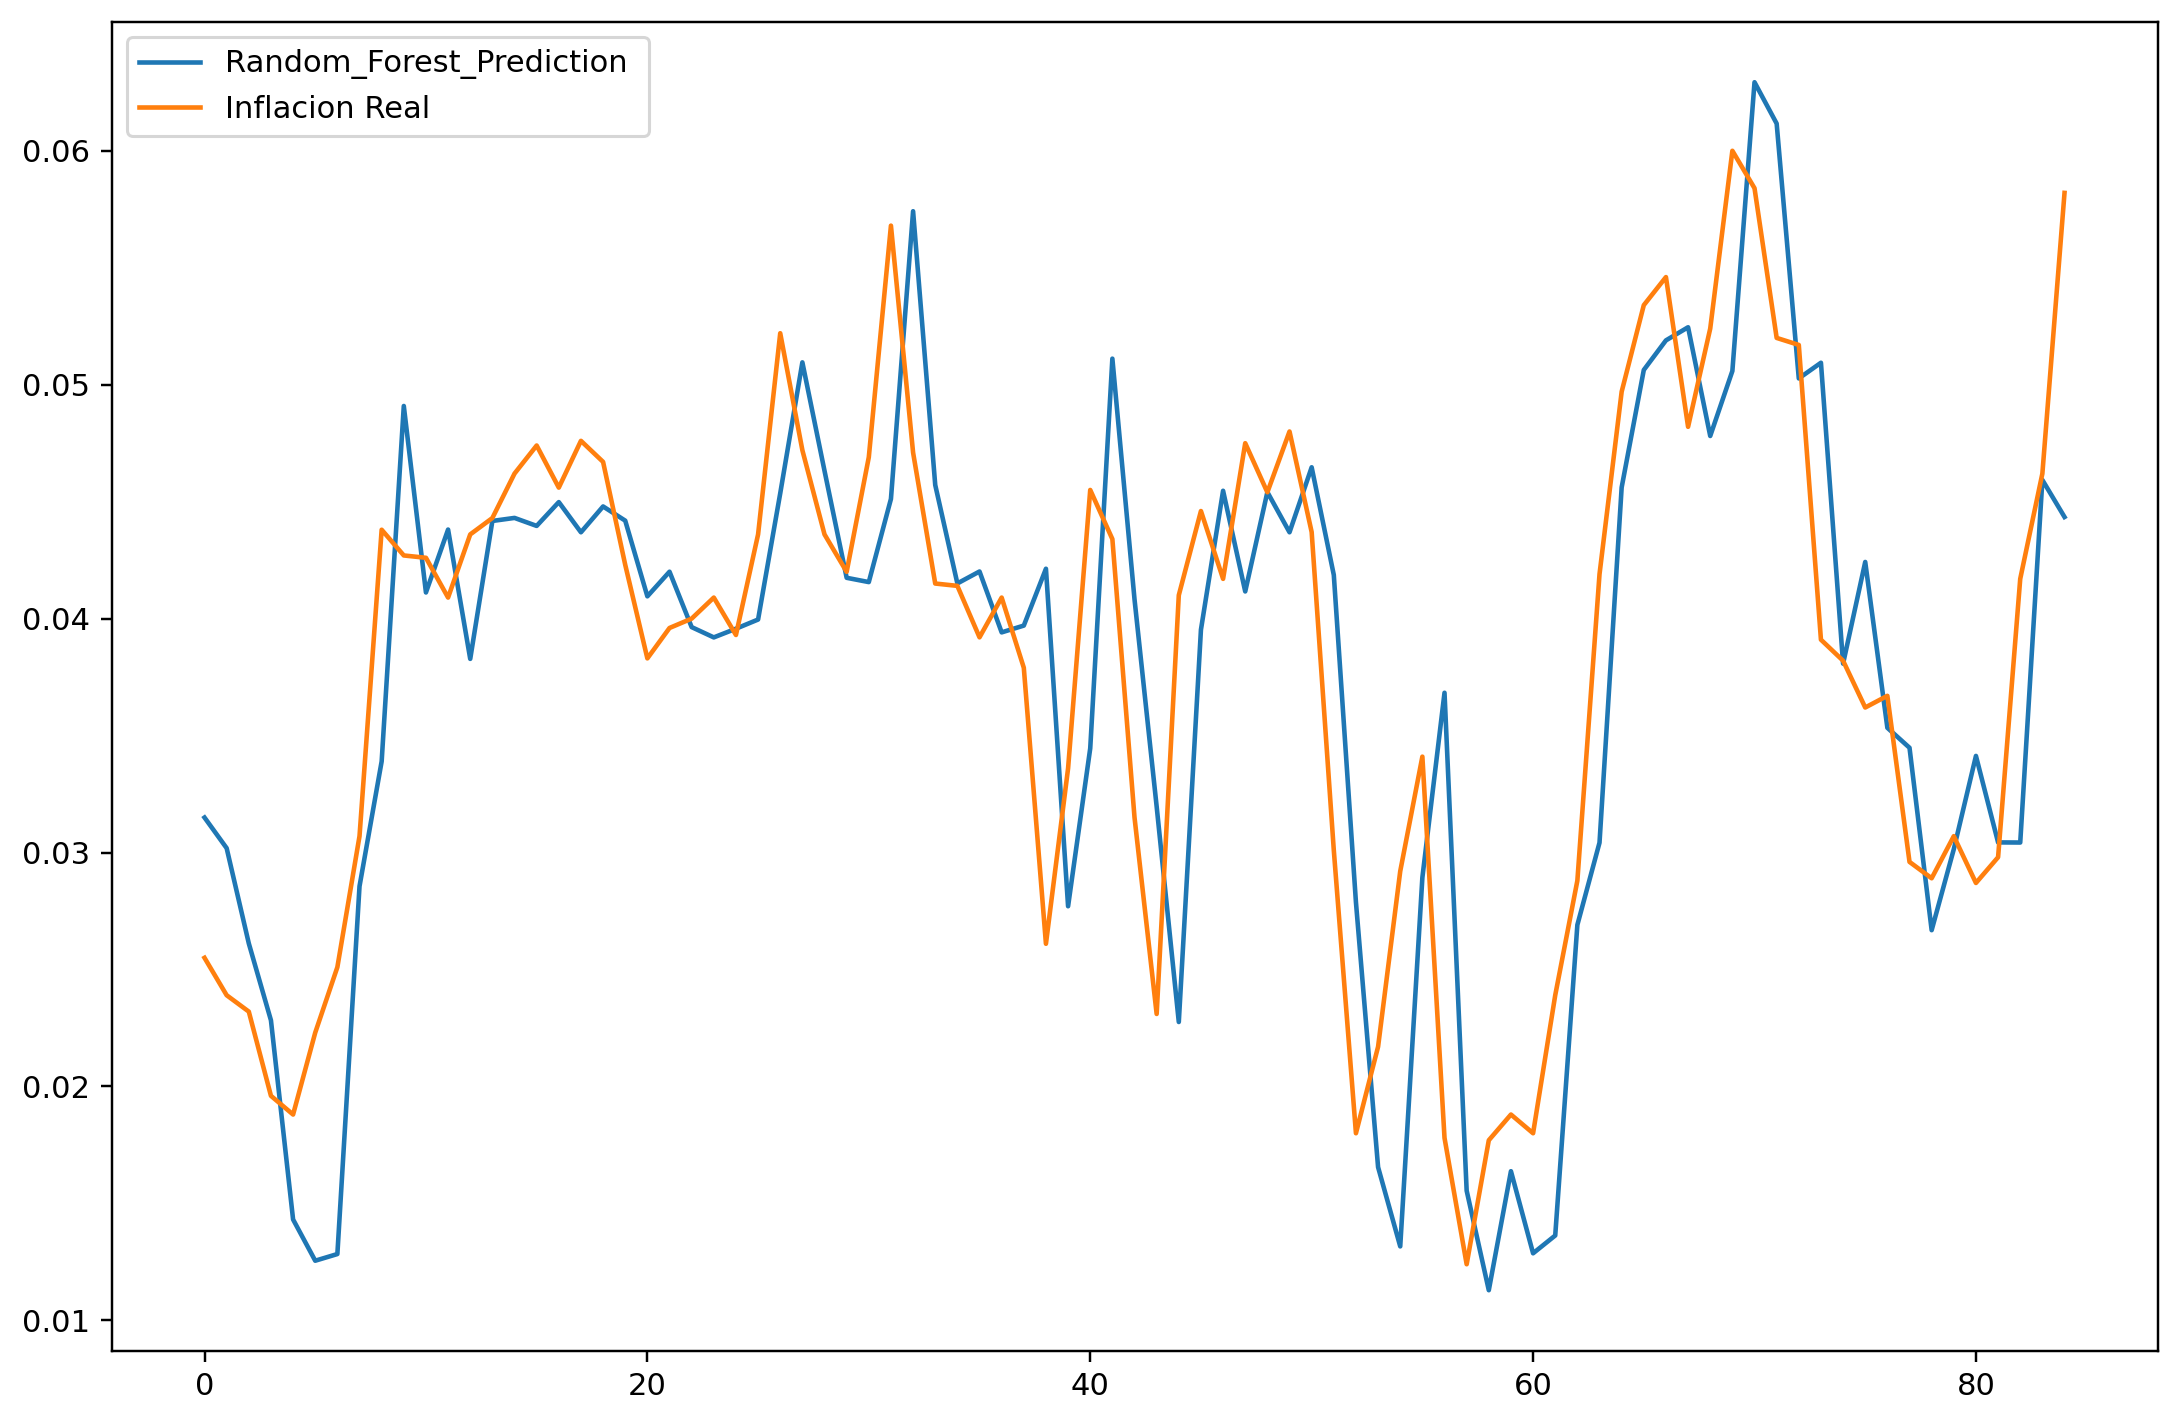

In [308]:
rf_prediction = rf_model.predict(x_test)
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(rf_prediction, label = 'Random_Forest_Prediction ')
plt.plot(y_test, label = 'Inflacion Real')
plt.legend(loc="upper left")
plt.show()


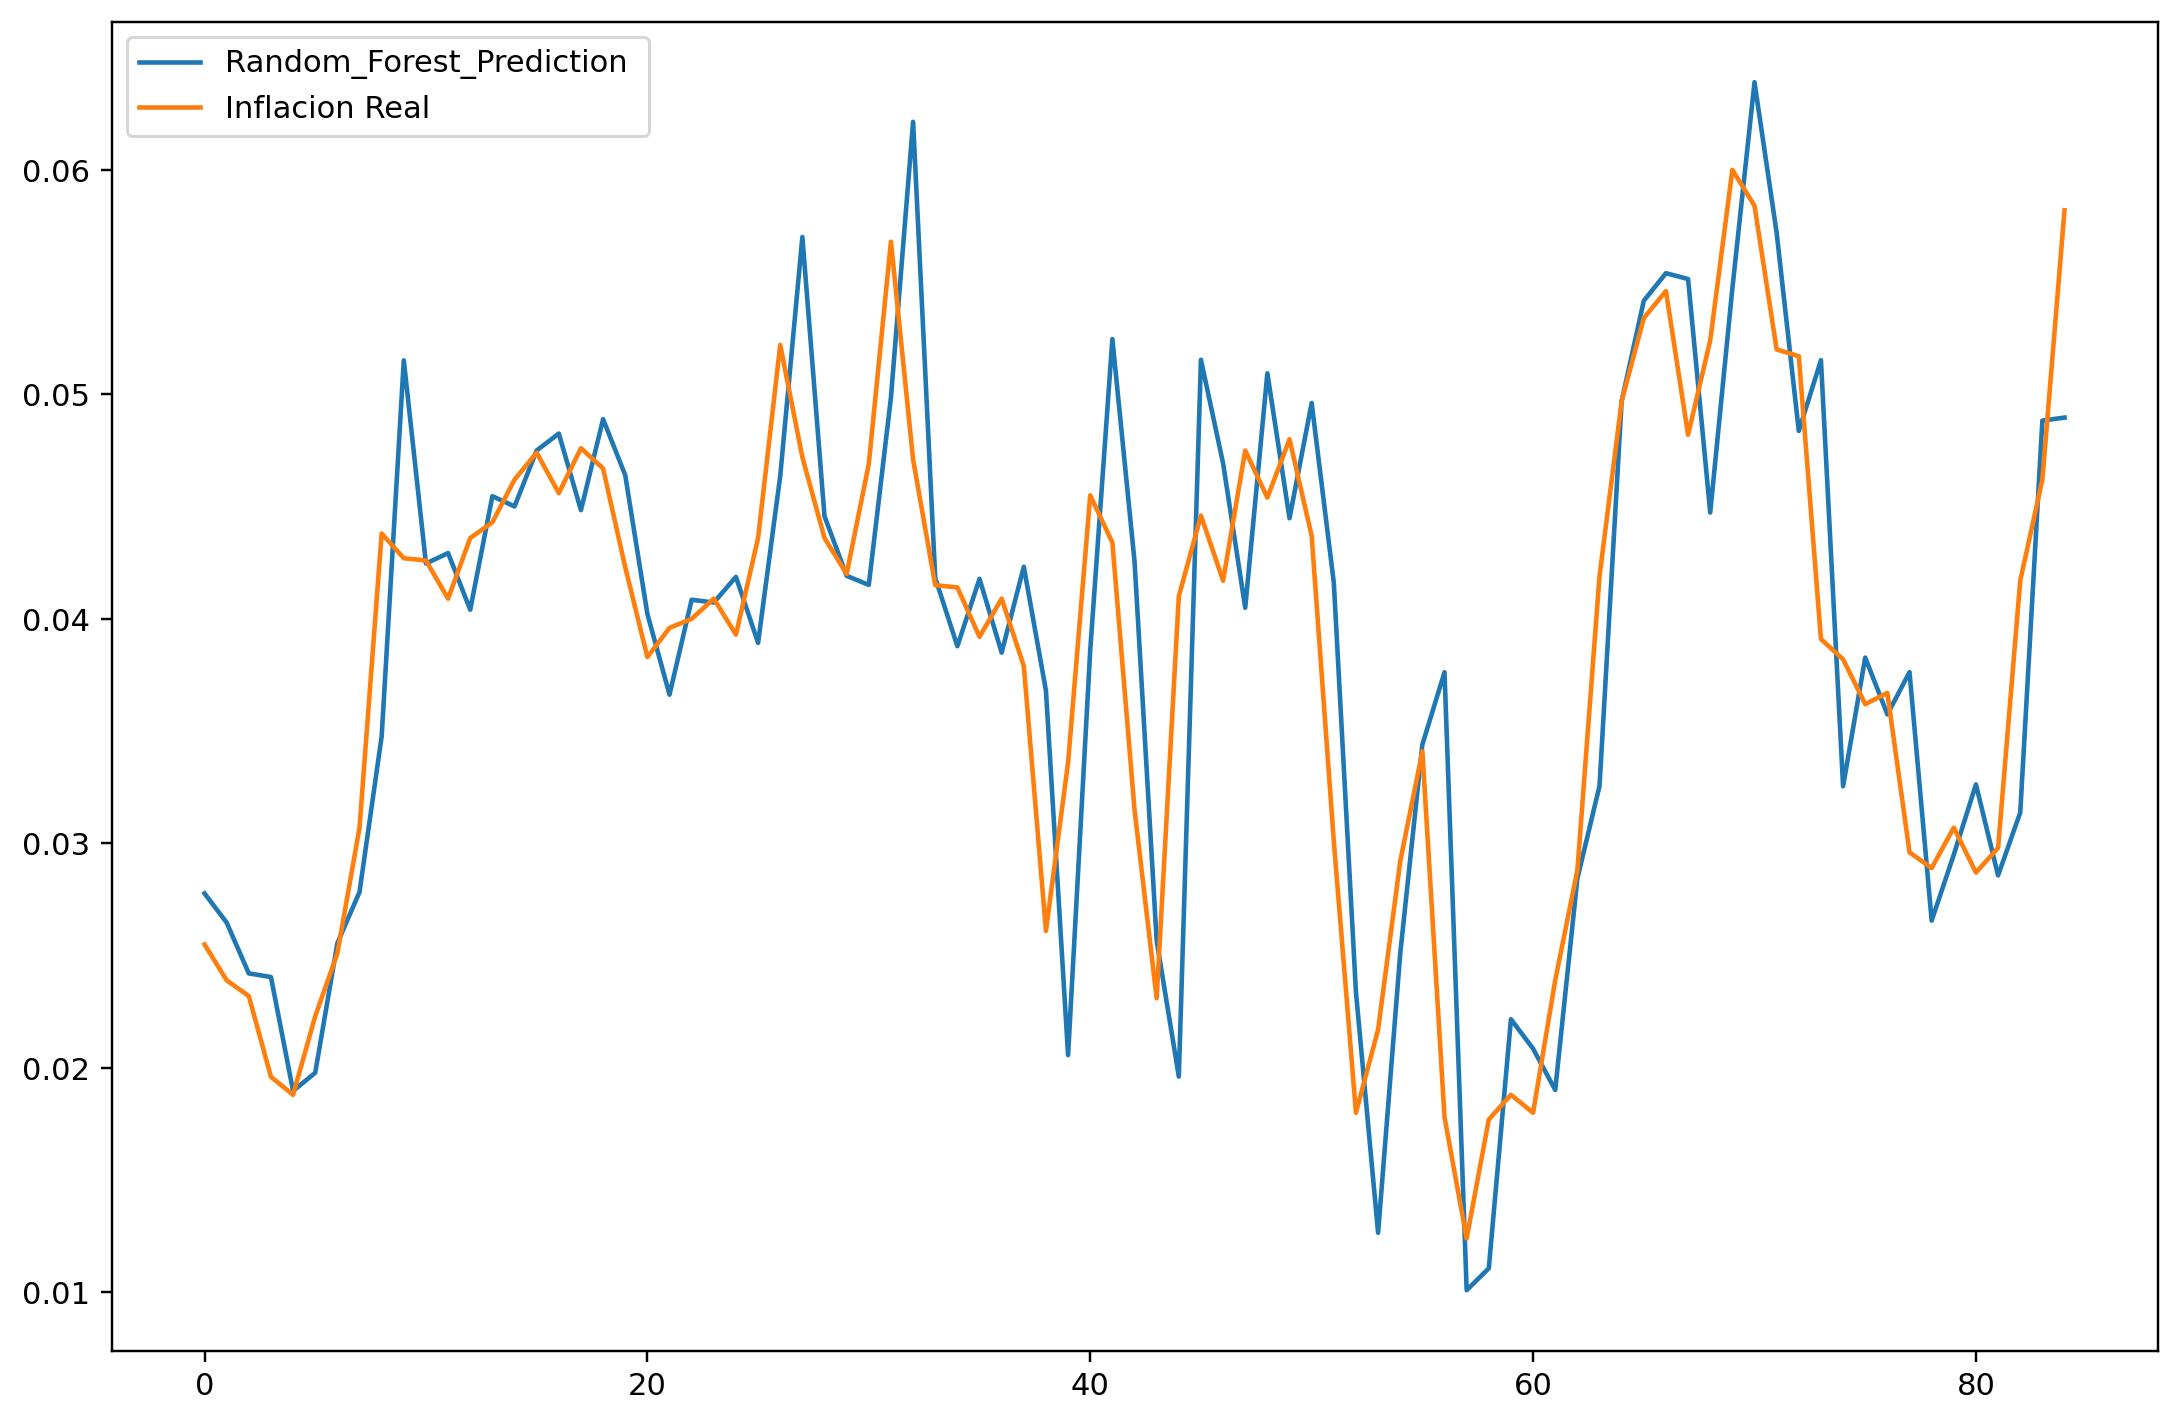

In [309]:
lin_prediction = lin_model.predict(x_test)
plt.rcParams["figure.figsize"]=(12,8)
plt.plot(lin_prediction, label = 'Random_Forest_Prediction ')
plt.plot(y_test, label = 'Inflacion Real')
plt.legend(loc="upper left")
plt.show()


### Para determinar RMSE de los modelos Random Forest y Linear Regression

In [310]:
rmse_rf = sqrt(mean_squared_error(rf_prediction,y_test))
rmse_rf


0.0069589662805705325

In [311]:
rmse_lin = sqrt(mean_squared_error(lin_prediction,y_test))
rmse_lin

0.006412205158230733

In [312]:
rf_model.score(x_test,y_test )


0.6096976408637739

In [313]:
lin_model.score(x_test,y_test)

0.6686198193781141

## LSTM - Long Short Term Memory

